In [1]:
# Import the dependecies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# create a set of random latitude and longitude combination.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy   

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5508d5f40232757097f1737f46707339


In [9]:
# Create an empty list to hold the weather data.
from datetime import datetime
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") 
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | arraial do cabo
Processing Record 2 of Set 13 | moissala
Processing Record 3 of Set 13 | ponta do sol
Processing Record 4 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 13 | rikitea
Processing Record 6 of Set 13 | mataura
Processing Record 7 of Set 13 | okhotsk
Processing Record 8 of Set 13 | bethel
Processing Record 9 of Set 13 | sorvag
City not found. Skipping...
Processing Record 10 of Set 13 | andilamena
Processing Record 11 of Set 13 | ostrovnoy
Processing Record 12 of Set 13 | eyl
Processing Record 13 of Set 13 | atuona
Processing Record 14 of Set 13 | lavrentiya
Processing Record 15 of Set 13 | port blair
Processing Record 16 of Set 13 | nikolskoye
Processing Record 17 of Set 13 | neftekamsk
Processing Record 18 of Set 13 | nabire
Processing Record 19 of Set 13 | hermanus
Processing Record 20 of Set 13 | ulladulla
Processing Record 21 of Set 13 | albany
P

Processing Record 36 of Set 16 | dezhou
Processing Record 37 of Set 16 | a
City not found. Skipping...
Processing Record 38 of Set 16 | saint george
Processing Record 39 of Set 16 | kedougou
Processing Record 40 of Set 16 | port moresby
Processing Record 41 of Set 16 | tooele
Processing Record 42 of Set 16 | sovetskiy
Processing Record 43 of Set 16 | chapada dos guimaraes
Processing Record 44 of Set 16 | montevideo
Processing Record 45 of Set 16 | oranjemund
Processing Record 46 of Set 16 | omboue
Processing Record 47 of Set 16 | awbari
Processing Record 48 of Set 16 | liaocheng
Processing Record 49 of Set 16 | san juan evangelista
Processing Record 50 of Set 16 | nanortalik
Processing Record 1 of Set 17 | saint-ambroise
Processing Record 2 of Set 17 | swellendam
Processing Record 3 of Set 17 | oktyabrskiy
Processing Record 4 of Set 17 | lolua
City not found. Skipping...
Processing Record 5 of Set 17 | rohri
Processing Record 6 of Set 17 | narsaq
Processing Record 7 of Set 17 | lata
Pr

Processing Record 21 of Set 20 | bahar
Processing Record 22 of Set 20 | alta floresta
Processing Record 23 of Set 20 | bafoulabe
Processing Record 24 of Set 20 | kokopo
Processing Record 25 of Set 20 | necochea
Processing Record 26 of Set 20 | sao filipe
Processing Record 27 of Set 20 | lorengau
Processing Record 28 of Set 20 | palabuhanratu
City not found. Skipping...
Processing Record 29 of Set 20 | skibbereen
Processing Record 30 of Set 20 | bam
Processing Record 31 of Set 20 | chokurdakh
Processing Record 32 of Set 20 | cabedelo
Processing Record 33 of Set 20 | mattru
Processing Record 34 of Set 20 | yar-sale
Processing Record 35 of Set 20 | bandipur
Processing Record 36 of Set 20 | ortigueira
Processing Record 37 of Set 20 | klaksvik
Processing Record 38 of Set 20 | vestmannaeyjar
Processing Record 39 of Set 20 | subaytilah
City not found. Skipping...
Processing Record 40 of Set 20 | jalu
Processing Record 41 of Set 20 | umzimvubu
City not found. Skipping...
Processing Record 42 o

Processing Record 9 of Set 24 | nicoya
Processing Record 10 of Set 24 | puerto colombia
Processing Record 11 of Set 24 | kajaani
Processing Record 12 of Set 24 | saint-pierre
Processing Record 13 of Set 24 | terenga
City not found. Skipping...
Processing Record 14 of Set 24 | acapulco
Processing Record 15 of Set 24 | blonduos
City not found. Skipping...
Processing Record 16 of Set 24 | road town
Processing Record 17 of Set 24 | doume
Processing Record 18 of Set 24 | karratha
Processing Record 19 of Set 24 | jiwani
Processing Record 20 of Set 24 | hualmay
Processing Record 21 of Set 24 | takaungu
Processing Record 22 of Set 24 | mergui
City not found. Skipping...
Processing Record 23 of Set 24 | saleaula
City not found. Skipping...
Processing Record 24 of Set 24 | dinar
Processing Record 25 of Set 24 | kholodnyy
Processing Record 26 of Set 24 | severomuysk
Processing Record 27 of Set 24 | port hawkesbury
Processing Record 28 of Set 24 | ornskoldsvik
Processing Record 29 of Set 24 | turu

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial Do Cabo,-22.9661,-42.0278,77.00,83,20,8.05,BR,2021-03-19 23:08:57
1,Moissala,8.3404,17.7663,79.27,59,90,6.38,TD,2021-03-19 23:15:49
2,Ponta Do Sol,32.6667,-17.1000,59.00,58,20,6.91,PT,2021-03-19 23:08:54
3,Rikitea,-23.1203,-134.9692,80.98,76,94,13.00,PF,2021-03-19 23:08:48
4,Mataura,-46.1927,168.8643,55.99,86,99,5.01,NZ,2021-03-19 23:08:41
5,Okhotsk,59.3833,143.3000,3.72,66,0,16.02,RU,2021-03-19 23:15:50
6,Bethel,41.3712,-73.4140,36.00,31,9,7.65,US,2021-03-19 23:05:56
7,Andilamena,-17.0167,48.5833,65.97,96,100,2.98,MG,2021-03-19 23:15:50
8,Ostrovnoy,68.0531,39.5131,14.81,80,100,33.31,RU,2021-03-19 23:10:35
9,Eyl,7.9803,49.8164,75.25,85,3,10.56,SO,2021-03-19 23:08:55


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2021-03-19 23:08:57,-22.9661,-42.0278,77.00,83,20,8.05
1,Moissala,TD,2021-03-19 23:15:49,8.3404,17.7663,79.27,59,90,6.38
2,Ponta Do Sol,PT,2021-03-19 23:08:54,32.6667,-17.1000,59.00,58,20,6.91
3,Rikitea,PF,2021-03-19 23:08:48,-23.1203,-134.9692,80.98,76,94,13.00
4,Mataura,NZ,2021-03-19 23:08:41,-46.1927,168.8643,55.99,86,99,5.01
...,...,...,...,...,...,...,...,...,...
584,Rocha,UY,2021-03-19 23:10:02,-34.4833,-54.3333,58.87,81,12,6.24
585,Axim,GH,2021-03-19 23:17:29,4.8699,-2.2405,79.57,80,100,5.35
586,Cooma,AU,2021-03-19 23:17:29,-36.2333,149.1333,57.20,82,90,10.36
587,Ust-Kuyga,RU,2021-03-19 23:17:30,70.0167,135.6000,-5.42,96,100,4.90


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevent fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

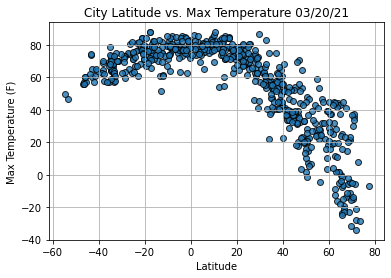

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

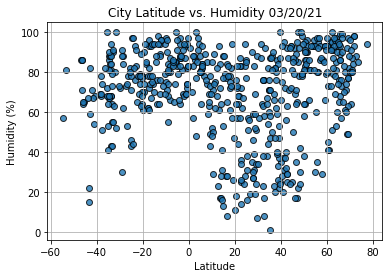

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

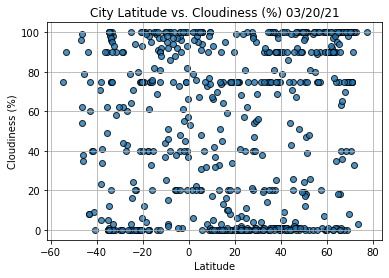

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

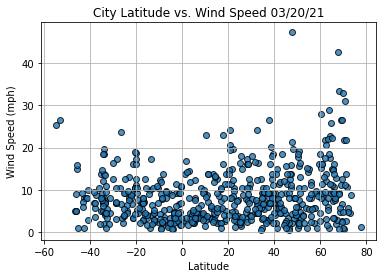

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
index13 = city_data_df.loc[13]
index13

City                   Nikolskoye
Country                        RU
Date          2021-03-19 23:05:41
Lat                       59.7035
Lng                       30.7861
Max Temp                       18
Humidity                       79
Cloudiness                      0
Wind Speed                   4.47
Name: 13, dtype: object

In [42]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
584    False
585     True
586    False
587     True
588     True
Name: Lat, Length: 589, dtype: bool

In [77]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Moissala,TD,2021-03-19 23:15:49,8.3404,17.7663,79.27,59,90,6.38
2,Ponta Do Sol,PT,2021-03-19 23:08:54,32.6667,-17.1000,59.00,58,20,6.91
5,Okhotsk,RU,2021-03-19 23:15:50,59.3833,143.3000,3.72,66,0,16.02
6,Bethel,US,2021-03-19 23:05:56,41.3712,-73.4140,36.00,31,9,7.65
8,Ostrovnoy,RU,2021-03-19 23:10:35,68.0531,39.5131,14.81,80,100,33.31
...,...,...,...,...,...,...,...,...,...
582,Kloulklubed,PW,2021-03-19 23:10:00,7.0419,134.2556,80.60,89,75,5.75
583,Ust-Tsilma,RU,2021-03-19 23:17:29,65.4410,52.1498,-3.84,94,94,3.33
585,Axim,GH,2021-03-19 23:17:29,4.8699,-2.2405,79.57,80,100,5.35
587,Ust-Kuyga,RU,2021-03-19 23:17:30,70.0167,135.6000,-5.42,96,100,4.90


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

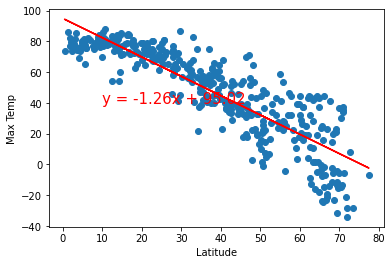

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

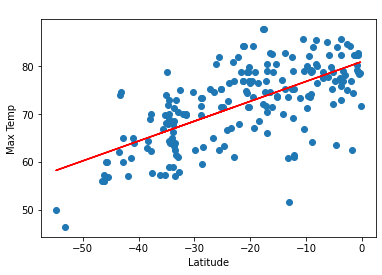

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

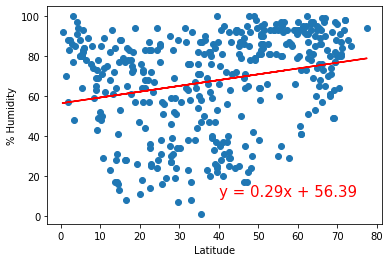

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [89]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

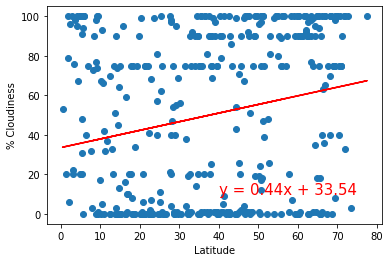

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

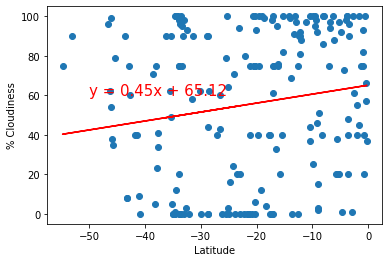

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

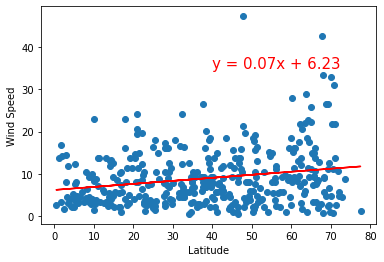

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

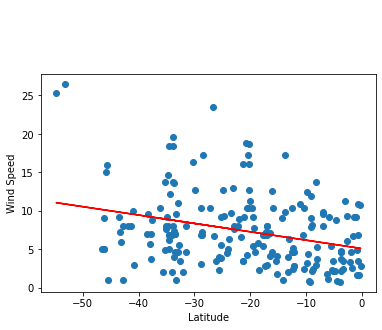

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))